In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

In [ ]:
pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.7 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10386 sha256=010ed1e86b01441df1f3e3cebf3bd221df8709660028866f90458269960ffab9
  Stored in directory: /root/.cache/pip/wheels/dc/5f/3a/fa496ade459f1dcb2bdef3ad74cbdff2c90c28d09d6db39859
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()


In [ ]:
image =cv2.imread('jim.jpg')
detections = embedder.extract(image, threshold=0.95)

1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


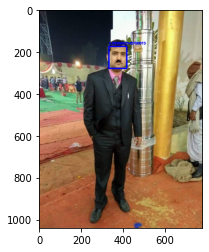

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[20]:


import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt


# In[21]:


from keras_facenet import FaceNet
embedder = FaceNet()


# In[12]:

def gen(image,moustache):
  image =cv2.imread(image)
  detections = embedder.extract(image, threshold=0.95)
  detection = detections[0]
  box = detection['box']
  x1 = box[0]
  y1 = box[1]
  x2 = x1+box[2]
  y2 = y1+box[3]
  img = cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 5)
  cv2.putText(img, str(detection['confidence']), (x1, y1-10),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img,cmap='hsv')
  mouth_left=detection['keypoints']['mouth_left']
  mouth_right = detection['keypoints']['mouth_right']
  nose=detection['keypoints']['nose']
  mouth_mid = ((mouth_left[0]+mouth_right[0])/2,
              (mouth_left[1]+mouth_right[1])/2)
  mouth_width=mouth_right[0]-mouth_left[0]
  mouth_height=mouth_mid[1]-nose[1]
  mush_img=cv2.imread(moustache)
  mush_img = cv2.resize(mush_img, (int(mouth_width),int(mouth_height)))
  # print(mush_img[0])
  mush_img_large=np.zeros(np.shape(img))
  mush_img_large+=255

  mush_img_large[int(nose[1]):int(mouth_mid[1]),int(mouth_left[0]):int(mouth_right[0]),:]=mush_img
  for i in range(np.shape(img)[0]):
      for j in range(np.shape(img)[1]):
          for k in range(3):
              if(mush_img_large[i][j][0] != 255 ):
                  
                  img[i][j][0]=0
                  img[i][j][1]=0
                  img[i][j][2]=0

  plt.imshow(img.astype('int32'))
  # print(img[0])
  plt.show()

# gen('jim.jpg','style2.jpeg')

# gen('jim.jpg','mo1_jpg.jpg')

# gen('/content/WhatsApp Image 2023-02-02 at 11.26.10 AM (1).jpeg','mo1_jpg.jpg')
gen('/content/WhatsApp Image 2023-02-02 at 11.26.10 AM (1).jpeg','style2.jpeg')

# gen('/content/WhatsApp Image 2023-02-02 at 11.26.11 AM (1).jpeg','style2.jpeg')



In [ ]:

# from keras_facenet import FaceNet
# embedder = FaceNet()